# 統計モデリング
#$ conda install -c r r-essentials

In [1]:
"+" <- function(e1, e2) {
    if (is.character(c(e1, e2))) {
        paste(e1, e2, sep = "")
    } else {
        base::"+"(e1, e2)
    }
}

## 2章 確率分布と統計モデルの最尤推定

### データ読み込み

In [2]:
# 2-1. 例題：種子数の統計モデリング
DIR="/var/jupyter/10_r/"
load(DIR + "data.RData")

### データをみる

In [3]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

In [4]:
length(data)

[1] 50

In [5]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [6]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

### ◆ベクトルの作成

ベクトルを作成する基本的な関数は c() である．

<span>
 c(1.0, 2.0, 3.0, 4.0, 5.0)  <br>
    長さ 5 のベクトルを作成する

[1] 1 2 3 4 5<br>

seq(1, 10, length=5)  <br>
    1 から 10 までを等分割した長さ 5 のベクトルを作る

[1] 1.00 3.25 5.50 7.75 10.00<br>
</span>

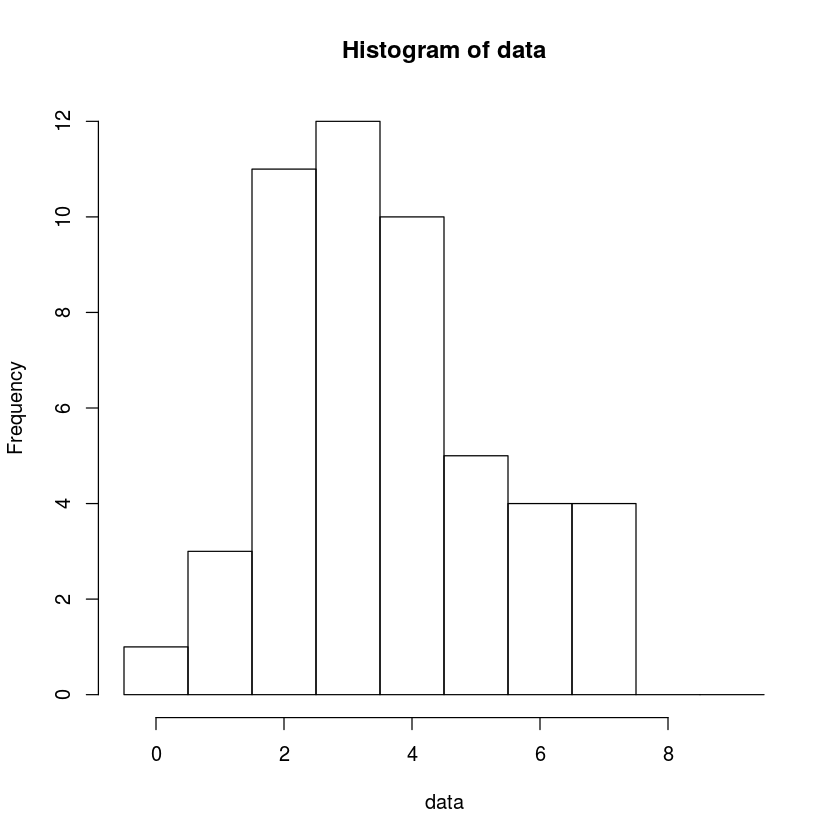

In [7]:
hist(data, breaks=seq(-0.5, 9.5, 1))

### ◆hist 関数 - 横幅を調整する方法

デフォルトでは、hist 関数によって描かれるヒストグラムの幅は、<br>
スタージェス（Sturges）の公式から計算される。

幅の計算式を変更する場合は、breaks 引数に、そのアルゴリズム名を与えればいい。<br>
スタージェスの公式（Sturges）以外に、Scott、FD または Freedman-Diacoins を<br>
与えることができる。

また、breaks に幅を直接指定したり、分割する値を指定したりすることもできる。

var: 分散=variance, sd:標準偏差=standard deviation

In [8]:
var(data)

[1] 2.986122

In [9]:
sd(data)

[1] 1.72804

In [10]:
sqrt(var(data))

[1] 1.72804

平均と分散が3前後で比較的近いので、ポアソン分布で近似できそう。

### ポアソン分布をプロット

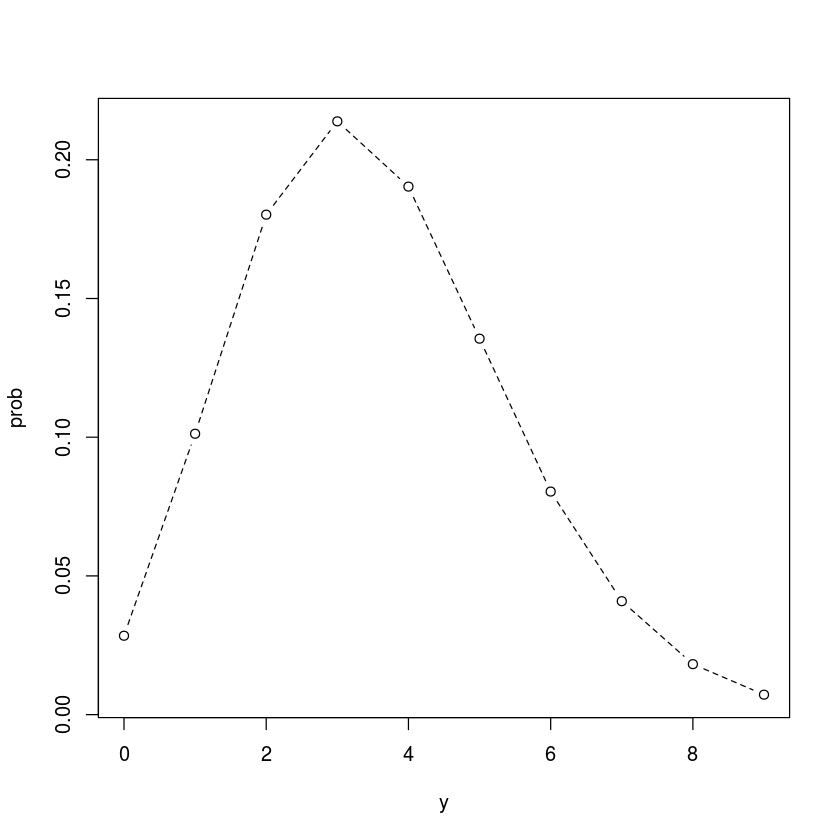

In [11]:
# 2-2. データと確率分布の対応関係をながめる
y = 0:9
prob = dpois(y, lambda=3.56)
plot(y, prob, type="b", lty=2)

### ◆plot() の形式指定

関数 plot() の引数 type によって様々な形式でプロットすることが出来る．<br>
type には次の 9 種類の文字のいずれかを指定することが出来る．<br>
<br>
引数/機能<br>
type="p" 点プロット(デフォルト)<br>
type="l" 線プロット(折れ線グラフ)<br>
type="b" 点と線のプロット<br>
type="c" "b" において点を描かないプロット<br>
type="o" 点プロットと線プロットの重ね書き<br>
type="h" 各点から x 軸までの垂線プロット<br>
type="s" 左側の値にもとづいて階段状に結ぶ<br>
type="S" 右側の値にもとづいて階段状に結ぶ<br>
type="n" 軸だけ描いてプロットしない(続けて低水準関数でプロットする場合)<br>


### ◆The Poisson Distribution<br>
https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Poisson.html

Description<br>
Density, distribution function, quantile function and random generation <br>
for the Poisson distribution with parameter lambda.

Usage<br>
dpois(x, lambda, log = FALSE)<br>
ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)<br>
qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)<br>
rpois(n, lambda)<br>

lambda	<br>
vector of (non-negative) means.

### データとポアソン分布の対応をみる

[1] 50

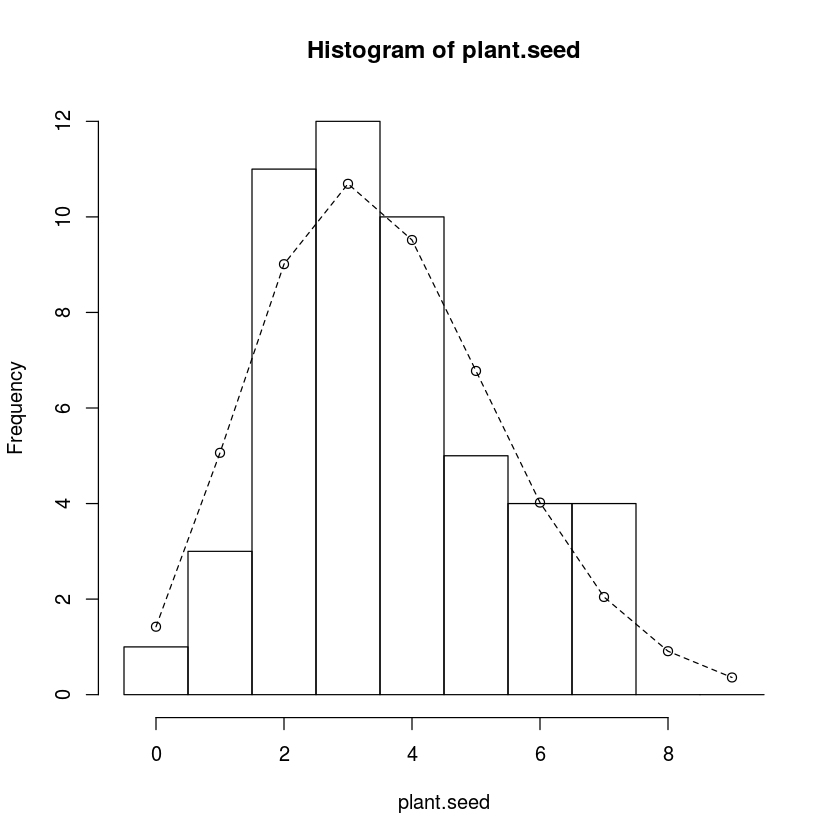

In [12]:
plant.seed = data
length(plant.seed)

hist(plant.seed, breaks = seq(-0.5, 9.5, 1))
points(y, prob * 50)
lines(y, prob * 50, lty = 2)

### lambda の値ごとのlog likelihoodをみる

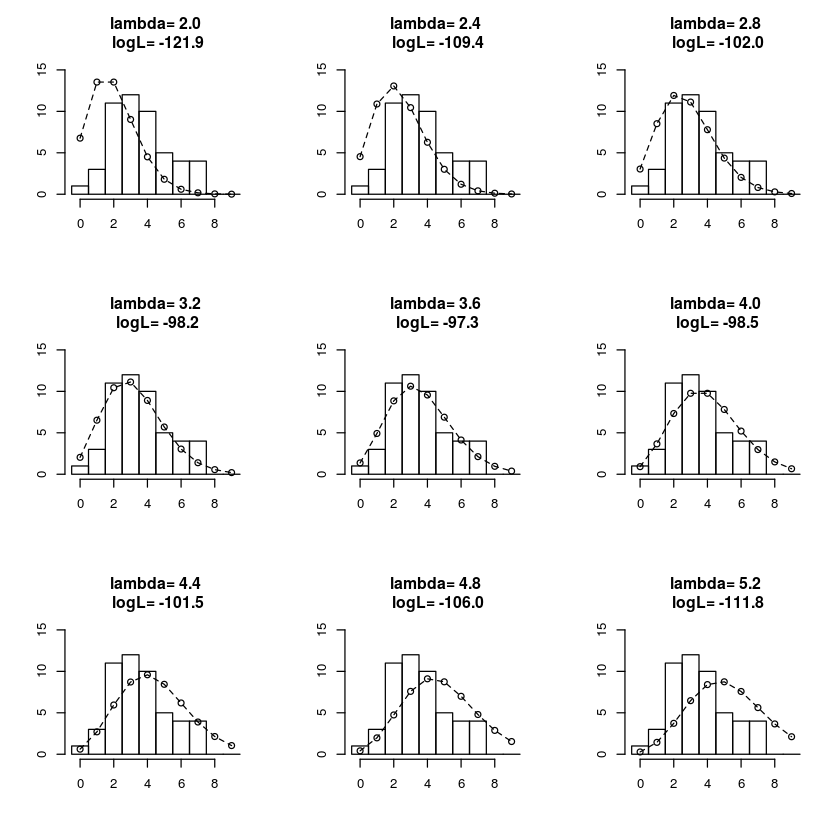

In [13]:
logL <- function(m) sum(dpois(data, m, log = TRUE))

plot.poisson <- function(lambda) {
  y <- 0:9
  prob <- dpois(y, lambda = lambda)

  hist(plant.seed, breaks = seq(-0.5, 9.5, 1), ylim = c(0, 15),
       main = "", xlab = "", ylab = "")
  points(y, prob * 50)
  lines(y,  prob * 50, lty = 2)

  title(sprintf("lambda= %.1f\n logL= %.1f", lambda, logL(lambda)))
}

layout(matrix(1:9, byrow = T, ncol = 3))
junk <- sapply(seq(2, 5.2, 0.4), plot.poisson)

### ◆apply 関数の基本的な使い方

行列型またはデータフレーム型のデータに対して、各行または各列に対して、<br>
同種の演算を一括に行うときに apply を利用する。<br>
apply の 1 つ目の引数にはデータを代入する。<br>
2 つ目の引数には 1 または 2 を代入する。1 は各行を意味し、2 は各列を意味する。<br>
また、3 つ目の引数には適用したい演算（関数名）を与える。<br>

apply(x,i,f)<br>
  行列・データフレーム（x）に対して、各行（i = 1）または各列（i = 2）ごとに演算（f）を行う。

lapply(x,f)<br>
  リスト（x）の各要素に対して演算（f）を行う。実行結果をリスト型で返す。

sapply(x,f)<br>
  リスト（x）の各要素に対して演算（f）を行う。実行結果をベクトル型で返す。

### ◆行列の作成

関数 matrix(ベクトル, 行数, 列数) でベクトルから行列に変換する<br>
例として，ベクトル （1，2，3，4，5，6） を変換して，行列   を作成する．<br>

<span>
 matrix(1:6, nrow=2, ncol=3) <br>
   nrow で行数，ncol で列数を指定する<br>
   matrix(1:6, 2, 3) と略記しても良い<br>

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

行列を作成する場合，指定された要素は左の列から順に (上から下へ) 埋められる．<br>
要素を上の行から順に (左から右へ) 埋める場合は，引数 byrow=T を指定する．
</span>

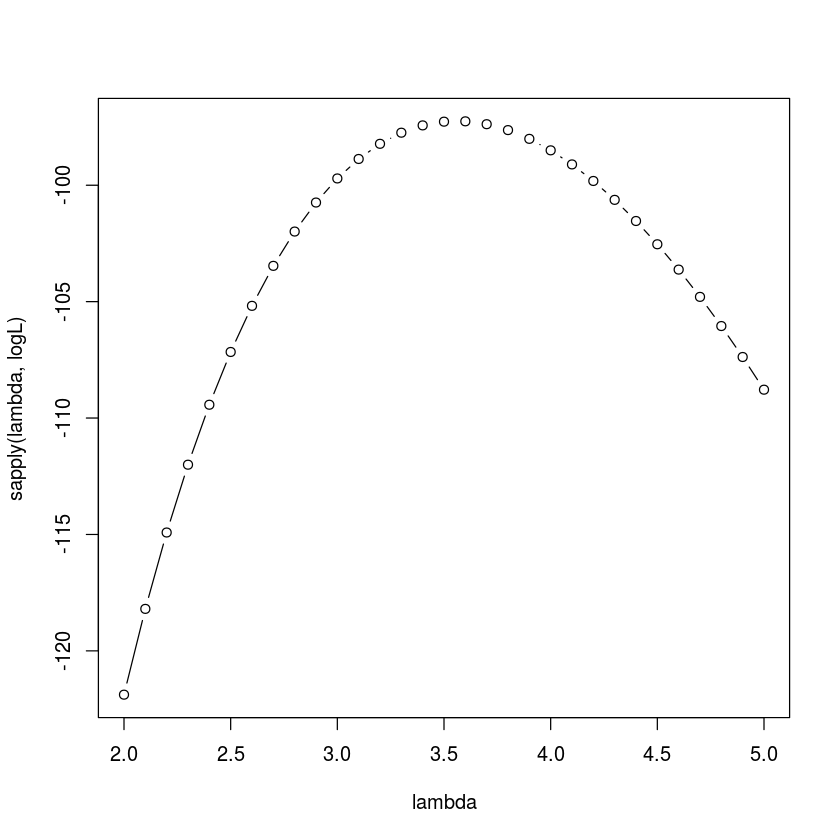

In [14]:
# Likelihood functionの形態をみる
logL <- function(m) sum(dpois(data, m, log = TRUE))
lambda <- seq(2, 5, 0.1)
plot(lambda, sapply(lambda, logL), type = "b")

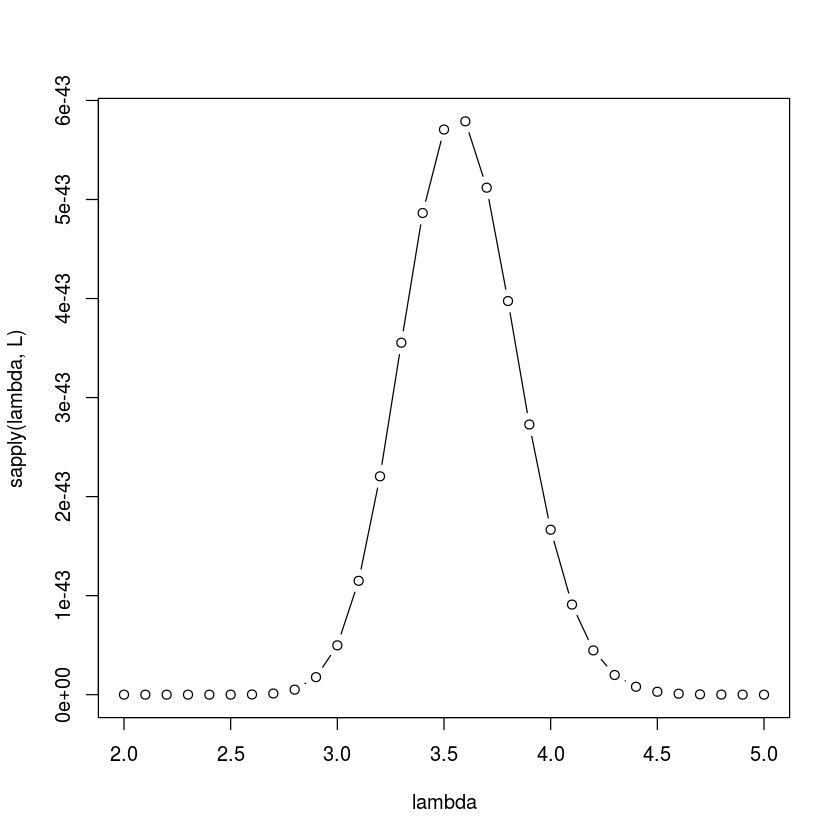

In [15]:
L <- function(m) prod(dpois(data, m, log = FALSE))
plot(lambda, sapply(lambda, L), type = "b")

### 最尤法を用いるポアソン回帰を行って切片のexp()を求めると同じ値

In [16]:
fit.poisson <- glm(plant.seed ~ 1, family = poisson)
exp(coef(fit.poisson))

(Intercept) 
       3.56

## 3章 一般化線形モデル(GLM)

### ◆RのGLM用関数

glm(): デフォルトで組み込まれている一般化線形モデルの関数<br>
glmnet(): パッケージ{glmnet}に含まれるElastic Net（Ridge+Lasso）を実装した一般化線形モデル

glm(モデル式, family = 目的変数の分布, data = データフレーム)<br>

->リンク関数も指定する場合<br>
glm(モデル式, family = 目的変数の分布(link = リンク関数), data = データフレーム)

In [17]:
d <- read.csv(DIR +　"data3a.csv")

In [18]:
d

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C
9,10.61,C
9,10.06,C
9,9.93,C
11,10.43,C


In [19]:
d$x

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [20]:
d$y

[1]  6  6  6 12 10  4  9  9  9 11  6 10  6 10 11  8  3  8  5  5  4 11  5 10  6
 [26]  6  7  9  3 10  2  9 10  5 11 10  4  8  9 12  8  9  8  6  6 10 10  9 12  6
 [51] 14  6  7  9  6  7  9 13  9 13  7  8 10  7 12  6 15  3  4  6 10  8  8  7  5
 [76]  6  8  9  9  6  7 10  6 11 11 11  5  6  4  5  6  5  8  5  9  8  6  8  7  9

In [21]:
d$f

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

In [22]:
class(d)

[1] "data.frame"

In [23]:
class(d$y)

[1] "integer"

In [24]:
class(d$x)

[1] "numeric"

In [25]:
class(d$f)

[1] "factor"

In [26]:
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

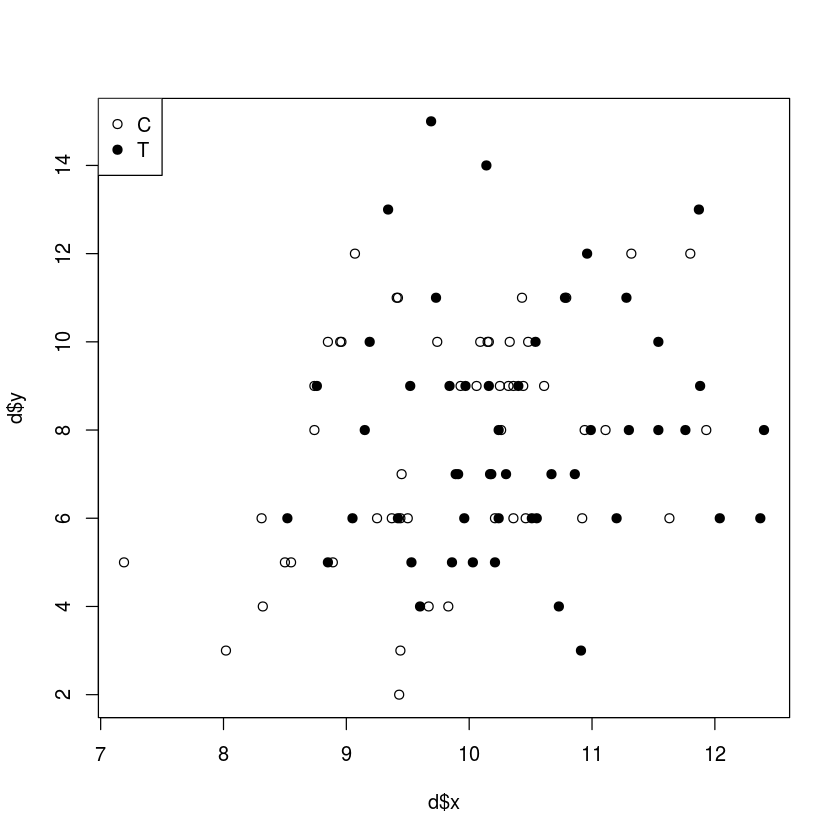

In [27]:
plot(d$x, d$y, pch=c(21,19)[d$f])
legend("topleft", legend=c("C", "T"), pch=c(21,19))

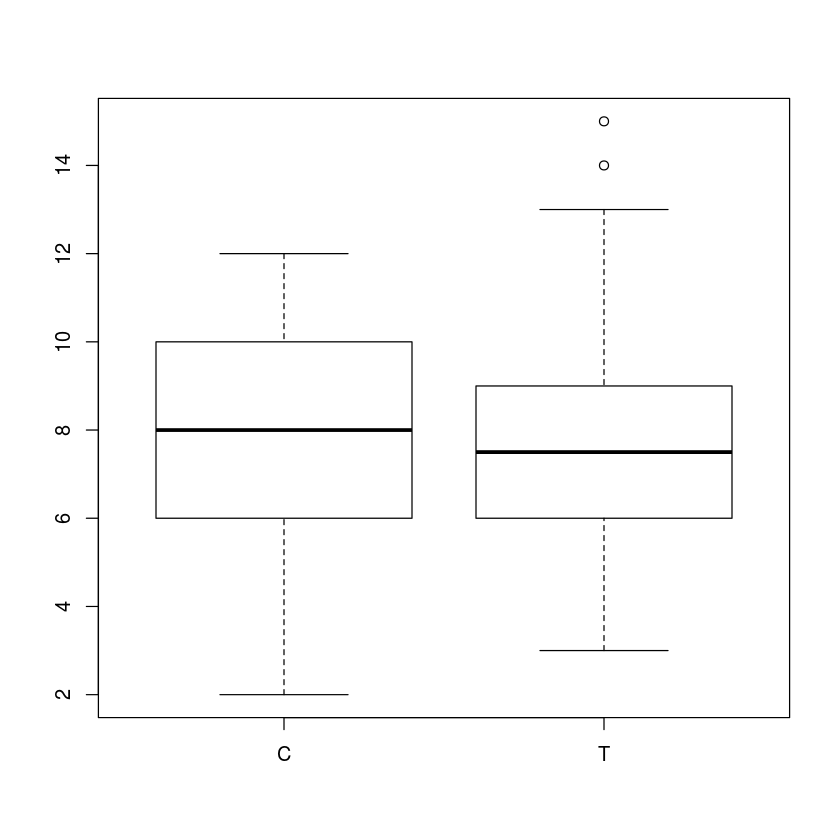

In [28]:
plot(d$f, d$y, pch=c(21,19)[d$f])

対数リンク関数を使って当てはめを行う。

In [29]:
fit <- glm(y ~ x, data = d, family = poisson(link = 'log'))
fit
summary(fit)


Call:  glm(formula = y ~ x, family = poisson(link = "log"), data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8


Call:
glm(formula = y ~ x, family = poisson(link = "log"), data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


Estimate によると、切片$\beta_1$は1.29, 傾き$\beta_2$は0.076。 <br>
Std. Error (SE) はこの推定値がどのくらいばらつくかを表している。 

対数尤度は最大尤度で最大値を取る凸関数。推定のばらつきが正規分布であると仮定し、<br>
さらに対数尤度関数は最大値付近での形が正規分布に近いと仮定すると（Wald統計量）、<br>
このように SE を求めることができる。 

z value: Wald 統計量。最尤推定値を SE で除した値。推定値が 0 から離れているかの目安になる値。

### 回帰モデルの対数尤度を取り出す logLik()

logLik() で、最大尤度（＝あてはまりの良さ）を算出することができる。<br>
df は自由度 (degrees of freedom)。

In [30]:
logLik(fit)

'log Lik.' -235.3863 (df=2)

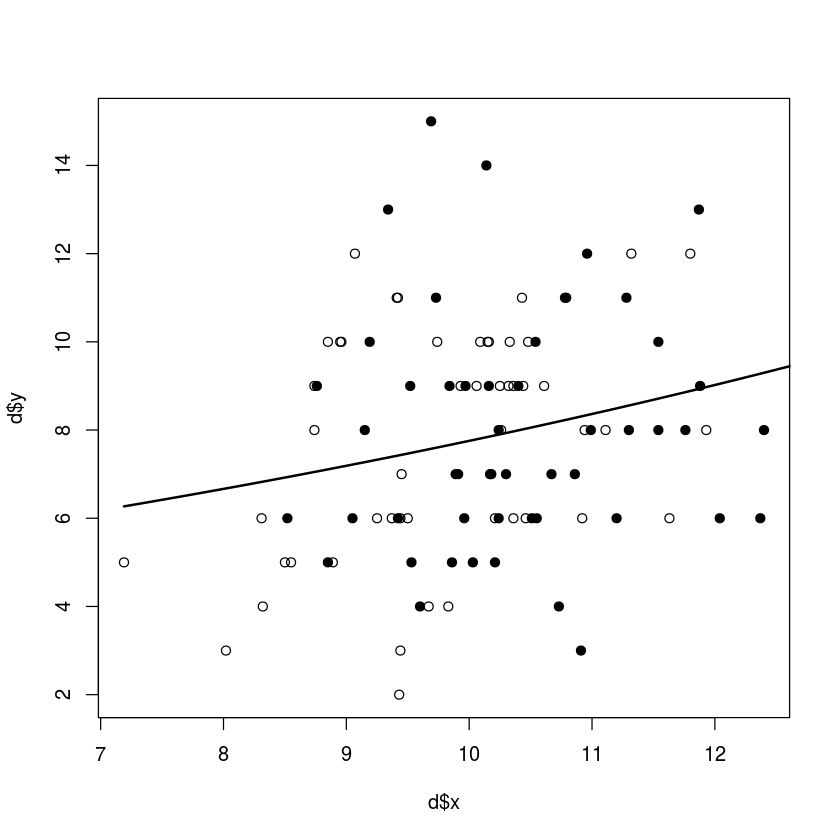

In [31]:
plot(d$x, d$y, pch=c(21,19)[d$f])
xx <- seq(min(d$x), max(d$y), length=100)
lines(xx, exp(1.29172 + 0.07566 * xx), lwd = 2)

predict() でも描ける。

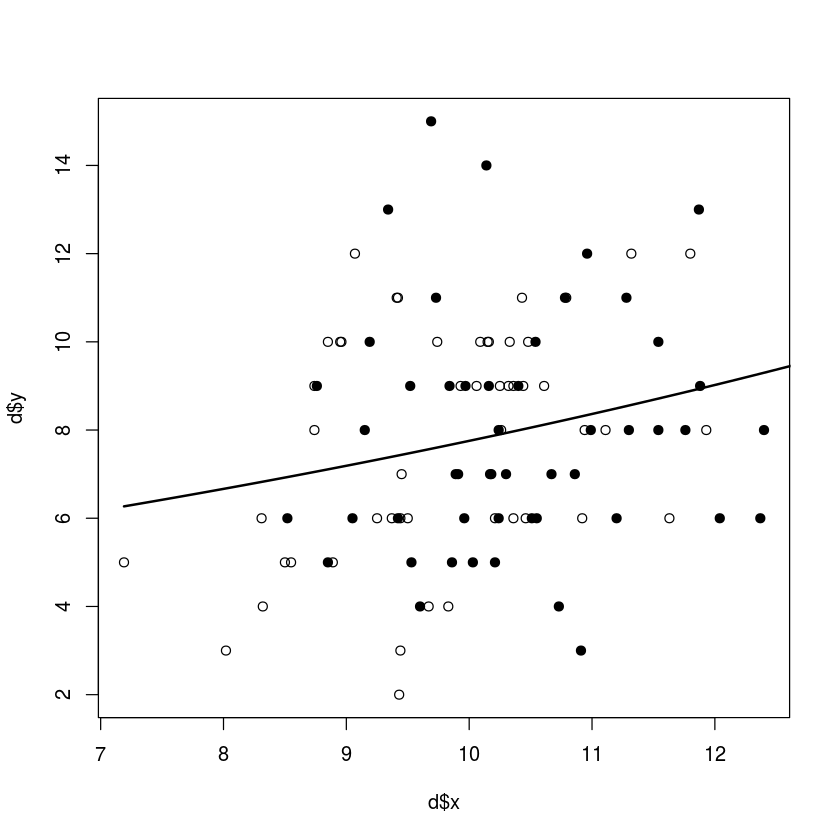

In [32]:
plot(d$x, d$y, pch=c(21,19)[d$f])
yy <- predict(fit, newdata = data.frame(x = xx), type="response")
lines(xx, yy, lwd = 2)

では、施肥効果 f を使った場合は？

In [33]:
fit.f <- glm(y ~ f, data = d, family = poisson(link = 'log'))
summary(fit.f)


Call:
glm(formula = y ~ f, family = poisson(link = "log"), data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47515  -0.69941   0.04264   0.72467   2.25204  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05156    0.05070  40.463   <2e-16 ***
fT           0.01277    0.07148   0.179    0.858    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.475  on 98  degrees of freedom
AIC: 479.25

Number of Fisher Scoring iterations: 4


わずかに、個体サイズ x だけを使った時より、誤差が大きくなっている。

<pre>
比較対象
   Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77
</pre>

In [34]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

では、素性総動員ではどうか？<br>
施肥効果は逆にマイナスになる。

In [35]:
fit.all <- glm(y ~ x + f, data = d, family = poisson(link = 'log'))
summary(fit.all)


Call:
glm(formula = y ~ x + f, family = poisson(link = "log"), data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3977  -0.7337  -0.2023   0.6795   2.4317  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.26311    0.36963   3.417 0.000633 ***
x            0.08007    0.03704   2.162 0.030620 *  
fT          -0.03200    0.07438  -0.430 0.667035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.808  on 97  degrees of freedom
AIC: 476.59

Number of Fisher Scoring iterations: 4


なんとか、誤差は一番小さくなっている。<br>
でも、これが良いモデルとは限らない。（まだ「あてはまり」しか評価していない）

In [36]:
logLik(fit.all)

'log Lik.' -235.2937 (df=3)

## 4章 GLMのモデル選択

In [37]:
d <- read.csv('data3a.csv')
fit <- glm(y ~ x, data = d, family = poisson(link = 'log'))
fit


Call:  glm(formula = y ~ x, family = poisson(link = "log"), data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

この　Null Deviance　と Residual Deviance が何を示しているのか？ Null Deviance は、切片のみを用いた一定モデルの逸脱度（＝最大逸脱度）と、全データ点を追従したモデル（＝フルモデル）の逸脱度（＝最小逸脱度）の差を表している。 Residual Deviance は、与えられたモデルの逸脱度と、最小逸脱度の差を表している。

### Given モデルの逸脱度

In [38]:
-2 * logLik(fit)

'log Lik.' 470.7725 (df=2)

### フルモデルの逸脱度

In [39]:
-2 * sum(log(dpois(d$y, lambda = d$y)))

[1] 385.7795

In [40]:
470.7725 - 385.779505048992

[1] 84.99299

ほぼ Residual Deviance に一致していることがわかる。

一方、一定モデルの逸脱度は、

In [41]:
fit <- glm(y ~ 1, data = d, family = poisson(link = 'log'))
-2 * logLik(fit)

'log Lik.' 475.2864 (df=1)

In [42]:
475.2864 - 385.779505048992

[1] 89.50689

ほぼ Null Deviance に一致していることがわかる。

### 参考文献

データ解析のための統計モデリング入門: 一般化線形モデル・階層ベイズモデル・MCMC<br>
http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html

データ解析のための統計モデリング入門　 - github
https://github.com/tushuhei/statisticalDataModeling

一般化線形モデル（と ベイズ推定）<br>
平成２７年 数理統計短期集合研修（応用編）<br>
農環研・生物多様性研究領域，山村光司<br>
http://cse.naro.affrc.go.jp/yamamura/Images/kenshuu_slide_glm_2015_applied.pdf

第7章 一般化線形混合モデル まとめ<br>
https://ysk24ok.github.io/2017/01/05/midoribon_section7.html

「データ解析のための統計モデリング入門」読書ノート<br>
7章 GLMMとGLMを比較する<br>
http://yagays.github.io/blog/2012/11/02/glm-mcmc-chp7/